In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reads data from a CSV file.
def read_data_from_csv(file_path):
    data = []
    with open(file_path, 'r') as csv_file:
        header = None
        for line in csv_file:
            if header is None:
                header = line.strip().split(',')
            else:
                values = line.strip().split(',')
                row = {}
                for i in range(len(header)):
                    row[header[i]] = values[i]
                data.append(row)
    return data

spotify_data = read_data_from_csv("D:\One drive (Subhais)\OneDrive\Documents\Spotify Data\spotify-2023.csv")

In [5]:
# Calculate the number of rows in the data
num_rows = len(spotify_data)

# Calculate the number of columns in the data
num_columns = len(spotify_data[0])

# Print the results
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 953
Number of Columns: 24


In [6]:
# Get the first row of the data
first_row = spotify_data[0]
for column_name in first_row.keys():
    print(column_name)

track_name
artist(s)_name
artist_count
released_year
released_month
released_day
in_spotify_playlists
in_spotify_charts
streams
in_apple_playlists
in_apple_charts
in_deezer_playlists
in_deezer_charts
in_shazam_charts
bpm
key
mode
danceability_%
valence_%
energy_%
acousticness_%
instrumentalness_%
liveness_%
speechiness_%


In [7]:
# Print the first 5 rows of the data in horizontal format
for i in range(5):
    row = spotify_data[i]
    print(f"Row {i + 1}: ", end='\n')  # Print row number
    for column_name, value in row.items():
        print(f"{column_name}: {value}", end=' | ')
    print('\n') 

Row 1: 
track_name: Seven (feat. Latto) (Explicit Ver.) | artist(s)_name: "Latto | artist_count:  Jung Kook" | released_year: 2 | released_month: 2023 | released_day: 7 | in_spotify_playlists: 14 | in_spotify_charts: 553 | streams: 147 | in_apple_playlists: 141381703 | in_apple_charts: 43 | in_deezer_playlists: 263 | in_deezer_charts: 45 | in_shazam_charts: 10 | bpm: 826 | key: 125 | mode: B | danceability_%: Major | valence_%: 80 | energy_%: 89 | acousticness_%: 83 | instrumentalness_%: 31 | liveness_%: 0 | speechiness_%: 8 | 

Row 2: 
track_name: LALA | artist(s)_name: Myke Towers | artist_count: 1 | released_year: 2023 | released_month: 3 | released_day: 23 | in_spotify_playlists: 1474 | in_spotify_charts: 48 | streams: 133716286 | in_apple_playlists: 48 | in_apple_charts: 126 | in_deezer_playlists: 58 | in_deezer_charts: 14 | in_shazam_charts: 382 | bpm: 92 | key: C# | mode: Major | danceability_%: 71 | valence_%: 61 | energy_%: 74 | acousticness_%: 7 | instrumentalness_%: 0 | live

In [8]:
# Calculates the Mean streams
def calculate_mean_streams(data):
    streams = []
    for song in data:
        try:
            streams.append(int(song['streams']))
        except ValueError:
            continue  
    return np.mean(streams)

In [9]:
# Call the function
mean_streams = calculate_mean_streams(spotify_data)

# Print the result
print("Mean Streams:", mean_streams)

Mean Streams: 348974978.3709168


In [10]:
# Calculates the Median streams
def calculate_median_streams(data):
    
    streams = []
    for song in data:
        try:
            streams.append(int(song['streams']))
        except ValueError:
            continue 
    return np.median(streams)

In [11]:
# Call the function
median_streams = calculate_median_streams(spotify_data)

# Print the result
print("Median Streams:", median_streams)

Median Streams: 132171975.0


In [12]:
# Calculate the Standard Deviation of streams
def calculate_std_deviation_streams(data):
    
    streams = []
    for song in data:
        try:
            streams.append(int(song['streams']))
        except ValueError:
            continue  
    return np.std(streams)

In [13]:
# Call the function
std_deviation_streams = calculate_std_deviation_streams(spotify_data)

# Print the result
print("Standard Deviation of Streams:", std_deviation_streams)

Standard Deviation of Streams: 542171925.6441169


In [14]:
# Define a function to plot stream statistics
def plot_stream_statistics(data):
    
    stream_counts = []

    for song in data:
        stream_str = song['streams'].replace(',', '')

        # Check if the stripped 'streams' value is a digit (valid)
        if stream_str.isdigit():
            # If it's a digit, convert it to an integer and add to the list
            stream_counts.append(int(stream_str))

    if not stream_counts:
        print("No valid stream counts found in the data.")
        return

    mean_streams = np.mean(stream_counts)
    median_streams = np.median(stream_counts)
    std_deviation = np.std(stream_counts)

  
    plt.figure(figsize=(10, 6))
    plt.hist(stream_counts, bins=50, color='lightblue', edgecolor='black', alpha=0.7)

    plt.axvline(mean_streams, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(median_streams, color='green', linestyle='dashed', linewidth=2, label='Median')

    plt.title('Stream Counts Distribution')
    plt.xlabel('Stream Counts')
    plt.ylabel('Frequency')

    plt.legend()
    plt.figtext(0.15, 0.7, f'Mean: {mean_streams:,.0f}', color='red')
    plt.figtext(0.15, 0.65, f'Median: {median_streams:,.0f}', color='green')
    plt.figtext(0.15, 0.6, f'Standard Deviation: {std_deviation:,.0f}', color='blue')

    plt.show()

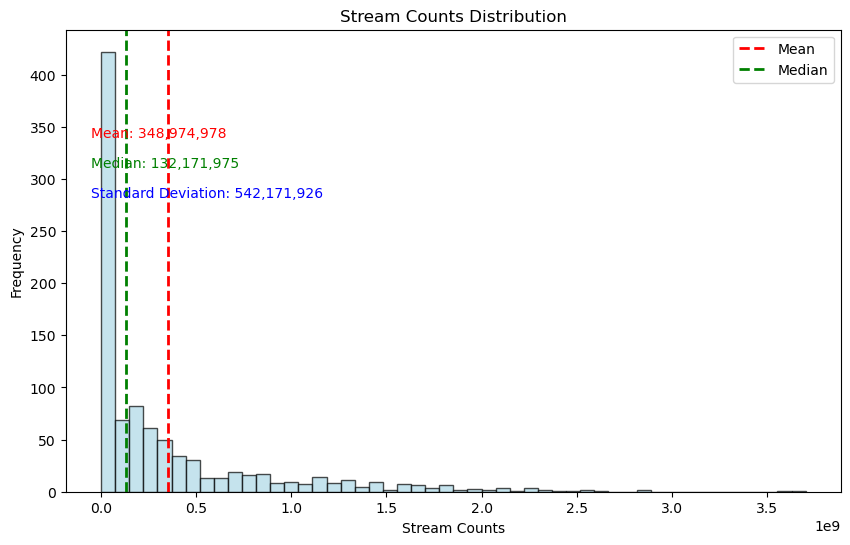

In [15]:
# Call the function
plot_stream_statistics(spotify_data)

In [16]:
# Gets the top 10 most streamed songs from the data.
def top_streamed_songs(data, n=10):
    
     # Filter out rows with non-numeric 'streams' values
    numeric_data = [entry for entry in data if entry['streams'].replace('.', '', 1).isdigit()]

    # Sort the numeric data by 'streams' in descending order
    sorted_data = sorted(numeric_data, key=lambda x: int(x['streams']), reverse=True)
    
    return sorted_data[:n]

In [17]:
# Call the top_streamed_songs function to get the top 10 streamed songs
top_streamed = top_streamed_songs(spotify_data, n=10)

# Print the top streamed songs
for song in top_streamed:
    print(f"Artist: {song['artist(s)_name']}")
    print(f"Song: {song['track_name']}")  # Assuming there's a 'song_name' column in your data
    print(f"Streams: {song['streams']}\n")

Artist: The Weeknd
Song: Blinding Lights
Streams: 3703895074

Artist: Ed Sheeran
Song: Shape of You
Streams: 3562543890

Artist: Lewis Capaldi
Song: Someone You Loved
Streams: 2887241814

Artist: Tones and I
Song: Dance Monkey
Streams: 2864791672

Artist: Imagine Dragons
Song: Believer
Streams: 2594040133

Artist: Ed Sheeran
Song: Perfect
Streams: 2559529074

Artist: Glass Animals
Song: Heat Waves
Streams: 2557975762

Artist: Harry Styles
Song: As It Was
Streams: 2513188493

Artist: James Arthur
Song: Say You Won't Let Go
Streams: 2420461338

Artist: Harry Styles
Song: Watermelon Sugar
Streams: 2322580122



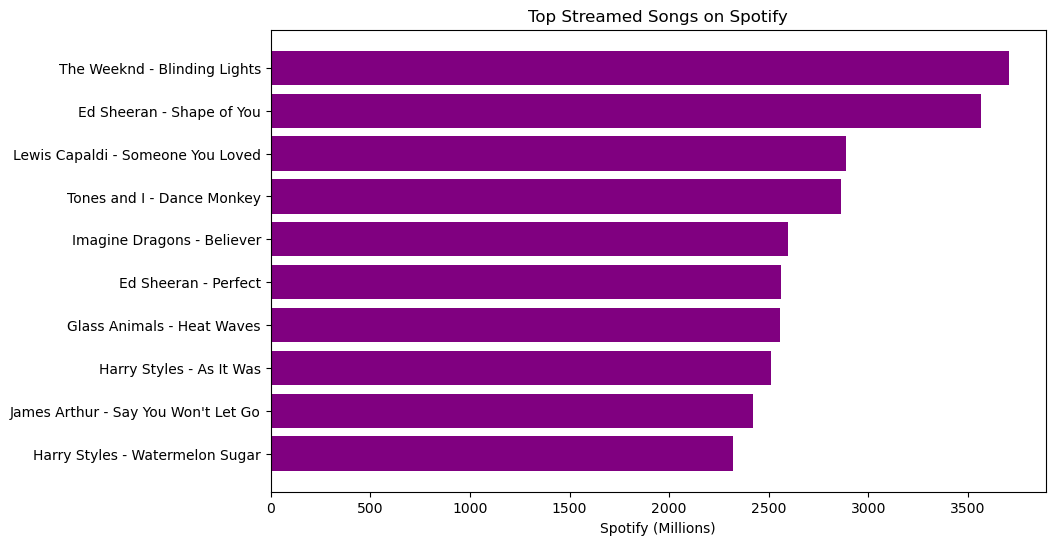

In [18]:
# Extract the top songs information
artists = [song['artist(s)_name'] for song in top_streamed]
songs = [song['track_name'] for song in top_streamed]
streams_millions = [float(song['streams']) / 1e6 for song in top_streamed]

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_streamed)), streams_millions, color='purple')
plt.yticks(range(len(top_streamed)), [f"{artist} - {song}" for artist, song in zip(artists, songs)])
plt.xlabel('Spotify (Millions)')
plt.title('Top Streamed Songs on Spotify')
plt.gca().invert_yaxis()
plt.show()

In [19]:
# Gets the top 10 most streamed songs from the data.
def top_streamed_songs_apple(data, n=10):
    
     # Filter out rows with non-numeric 'in_apple_charts' values
    numeric_data = [entry for entry in data if entry['in_apple_charts'].replace('.', '', 1).isdigit()]

    # Sort the numeric data by 'in_apple_charts' values in descending order
    sorted_data = sorted(numeric_data, key=lambda x: float(x['in_apple_charts']), reverse=True)

    return sorted_data[:n]

In [20]:
# Call the top_streamed_songs function to get the top 10 streamed songs
top_streamed = top_streamed_songs_apple(spotify_data, n=10)

# Print the top streamed songs
for song in top_streamed:
    print(f"Artist: {song['artist(s)_name']}")
    print(f"Song: {song['track_name']}") 
    print(f"Streams: {song['in_apple_charts']}\n")

Artist: "Drake
Song: One Dance
Streams: 2713922350

Artist: "Ray Dalton
Song: Can't Hold Us (feat. Ray Dalton)
Streams: 1953533826

Artist: "Dua Lipa
Song: Cold Heart - PNAU Remix
Streams: 1605224506

Artist: "Justin Bieber
Song: Peaches (feat. Daniel Caesar & Giveon)
Streams: 1445941661

Artist:  Vol. 52"
Song: "Quevedo: Bzrp Music Sessions
Streams: 1356565093

Artist: "Imagine Dragons
Song: Enemy - from the series Arcane League of Legends
Streams: 1223481149

Artist: "Bruno Mars
Song: Leave The Door Open
Streams: 1115880852

Artist: "Tyler
Song: See You Again
Streams: 1047101291

Artist: "Pharrell Williams
Song: Get Lucky - Radio Edit
Streams: 933815613

Artist: "The Weeknd
Song: Creepin'
Streams: 843957510



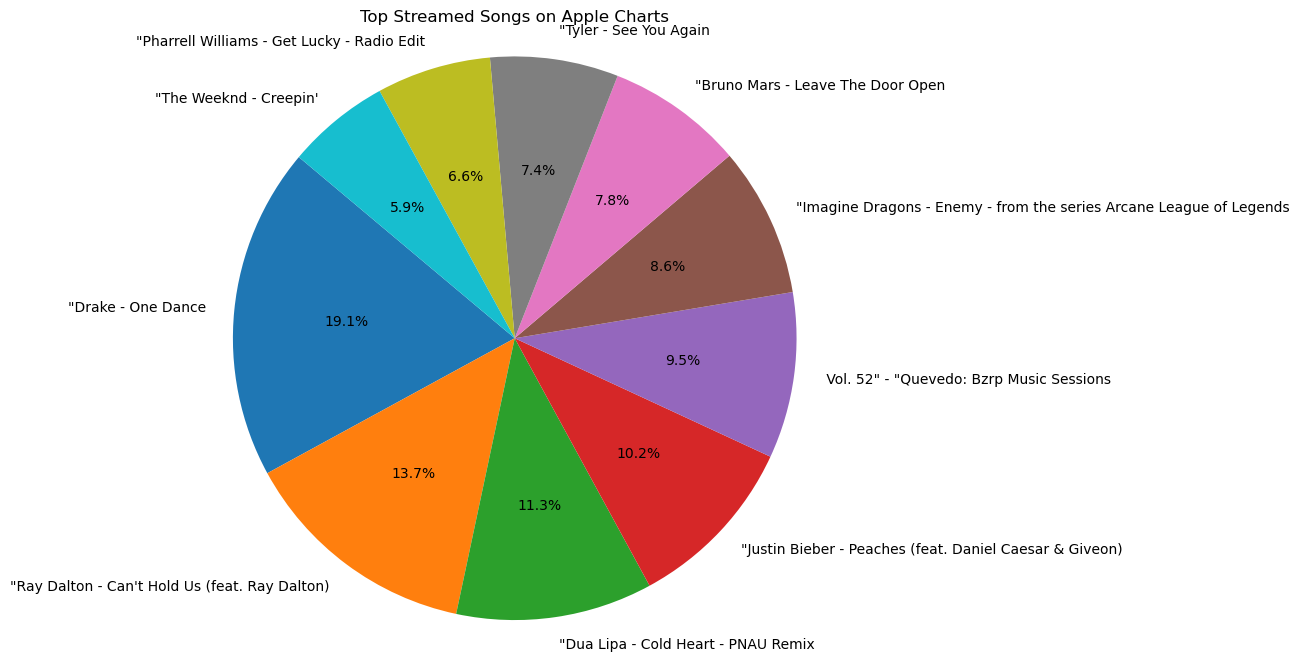

In [21]:
# Extract the top songs' information
artists = [song['artist(s)_name'] for song in top_streamed]
songs = [song['track_name'] for song in top_streamed]
streams_millions = [float(song['in_apple_charts']) / 1e6 for song in top_streamed]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(streams_millions, labels=[f"{artist} - {song}" for artist, song in zip(artists, songs)], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Top Streamed Songs on Apple Charts')
plt.show()

In [22]:
# Gets the top 10 most streamed songs from the data.
def top_streamed_songs_deezer(data, n=10):
    
     # Filter out rows with non-numeric 'in_deezer_playlists' values
    numeric_data = [entry for entry in data if entry['in_deezer_playlists'].replace('.', '', 1).isdigit()]

    # Sort the numeric data by 'in_deezer_playlists' values in descending order
    sorted_data = sorted(numeric_data, key=lambda x: float(x['in_deezer_playlists']), reverse=True)
    
    return sorted_data[:n]

In [23]:
# Call the top_streamed_songs function to get the top 10 streamed songs
top_streamed = top_streamed_songs_deezer(spotify_data, n=10)

# Print the top streamed songs
for song in top_streamed:
    print(f"Artist: {song['artist(s)_name']}")
    print(f"Song: {song['track_name']}") 
    print(f"Streams: {song['in_deezer_playlists']}\n")

Artist: "Imagine Dragons
Song: Enemy (with JID) - from the series Arcane League of Legends
Streams: 1223481149

Artist: "Riton
Song: Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit
Streams: 863756573

Artist: "John Lennon
Song: Happy Xmas (War Is Over)
Streams: 460492795

Artist: "Charli XCX
Song: OUT OUT (feat. Charli XCX & Saweetie)
Streams: 427486004

Artist: "Nengo Flow
Song: La Llevo Al Cielo (Ft. ï¿½ï¿½engo F
Streams: 333146475

Artist: "Lit Killah
Song: Entre Nosotros (Remix) [con Nicki Nicole]
Streams: 236940480

Artist: "Luï¿½ï¿½sa Sonza
Song: sentaDONA (Remix) s2
Streams: 176290831

Artist: "Fran C
Song: BABY OTAKU
Streams: 159240673

Artist: "Pharrell Williams
Song: Cash In Cash Out
Streams: 136676504

Artist: "Dj LK da Escï¿½ï¿½cia
Song: Tubarï¿½ï¿½o Te
Streams: 116144341



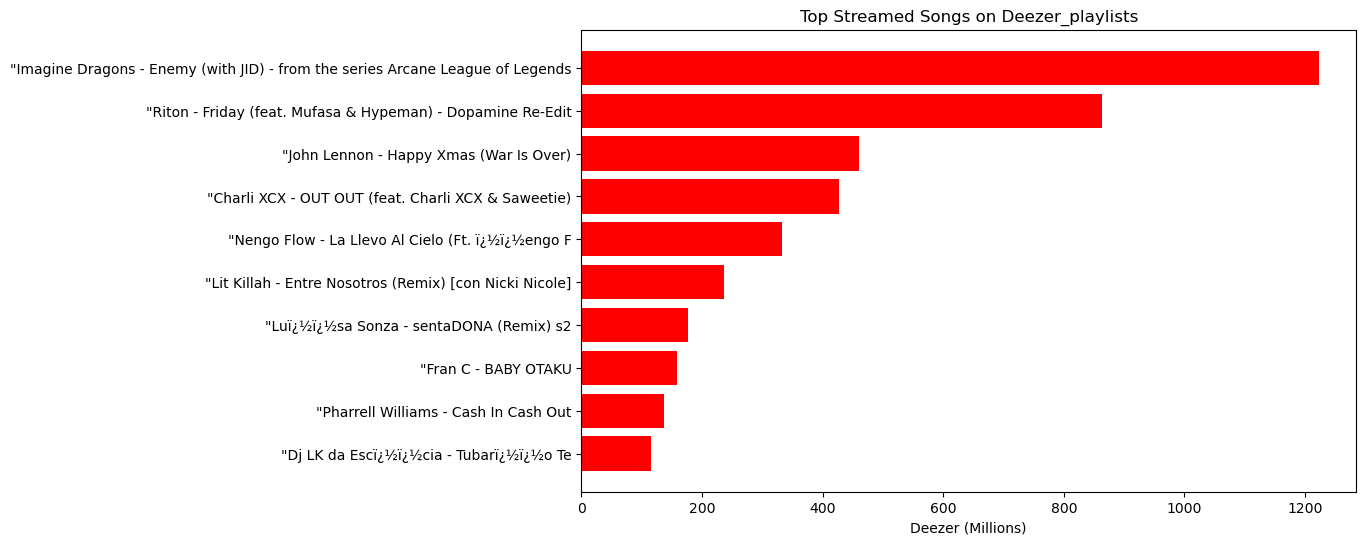

In [24]:
# Extract the top songs' information
artists = [song['artist(s)_name'] for song in top_streamed]
songs = [song['track_name'] for song in top_streamed]
streams_millions = [float(song['in_deezer_playlists']) / 1e6 for song in top_streamed]

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_streamed)), streams_millions, color='red')
plt.yticks(range(len(top_streamed)), [f"{artist} - {song}" for artist, song in zip(artists, songs)])
plt.xlabel('Deezer (Millions)')
plt.title('Top Streamed Songs on Deezer_playlists')
plt.gca().invert_yaxis()
plt.show()

In [25]:
# Gets the top 5 most streamed songs from the data.
def top_streamed_songs_shazam(data, n=5):
    
     # Filter out rows with non-numeric 'in_shazam_charts' values
    numeric_data = [entry for entry in data if entry['in_shazam_charts'].replace('.', '', 1).isdigit()]

    # Sort the numeric data by 'in_shazam_charts' values in descending order
    sorted_data = sorted(numeric_data, key=lambda x: float(x['in_shazam_charts']), reverse=True)

    return sorted_data[:n]

In [26]:
# Call the top_streamed_songs function to get the top 5 streamed songs
top_streamed = top_streamed_songs_shazam(spotify_data, n=5)

# Print the top streamed songs
for song in top_streamed:
    print(f"Artist: {song['artist(s)_name']}")
    print(f"Song: {song['track_name']}") 
    print(f"Streams: {song['in_shazam_charts']}\n")

Artist: "Vishal-Shekhar
Song: "Besharam Rang (From ""Pathaan"")"
Streams: 140187018

Artist:  JVKE & Muni Long)"
Song: "Angel Pt 1 (feat. Jimin of BTS
Streams: 133753727

Artist:  Halsey
Song: "Stay With Me (with Justin Timberlake
Streams: 123473120

Artist: "Jordan Fisher
Song: "Nobody Like U - From ""Turning Red"""
Streams: 120847157

Artist:  NAV
Song: "Calling (Spider-Man: Across the Spider-Verse) (Metro Boomin & Swae Lee
Streams: 109276132



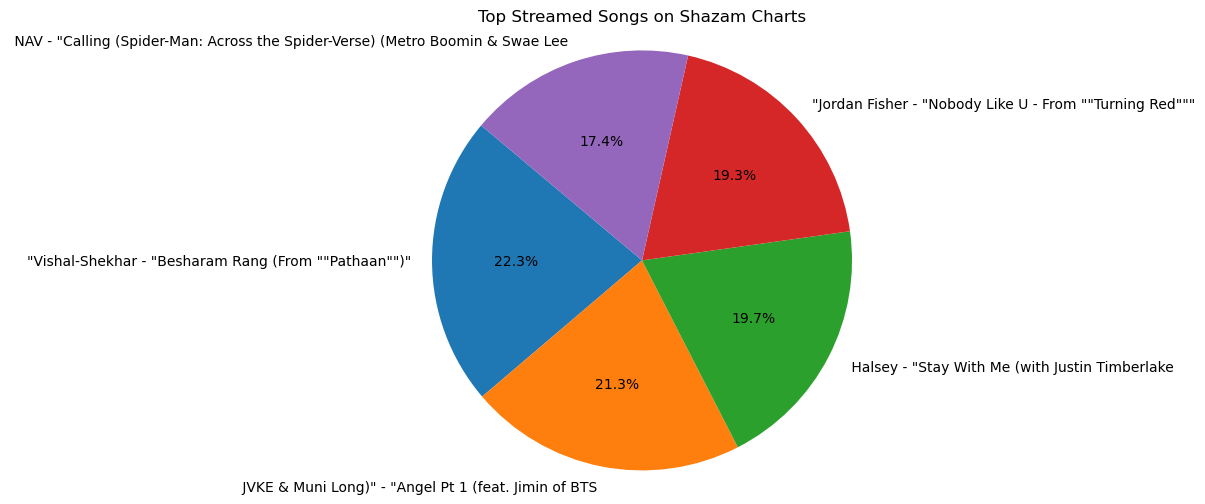

In [27]:
# Extract the top songs' information
artists = [song['artist(s)_name'] for song in top_streamed]
songs = [song['track_name'] for song in top_streamed]
streams_millions = [float(song['in_shazam_charts']) / 1e6 for song in top_streamed]

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(streams_millions, labels=[f"{artist} - {song}" for artist, song in zip(artists, songs)], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top Streamed Songs on Shazam Charts')
plt.show()

In [28]:
# Counts the number of tracks released in each month of 2022.
def count_tracks_by_month_with_names(data):
    month_names = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December',
    }

    month_counts = {month_name: 0 for month_name in month_names.values()}

    for song in data:
        if song['released_year'] == '2022':
            month = int(song['released_month'])
            month_name = month_names.get(month)
            if month_name:
                month_counts[month_name] +=1

    return month_counts

In [29]:
# calling the function 
tracks_by_month = count_tracks_by_month_with_names(spotify_data)

# Prints the number of songs released in each month of 2022
for month, count in tracks_by_month.items():
    print(f"{month}: {count} songs released")

January: 24 songs released
February: 14 songs released
March: 14 songs released
April: 20 songs released
May: 53 songs released
June: 17 songs released
July: 17 songs released
August: 12 songs released
September: 10 songs released
October: 28 songs released
November: 7 songs released
December: 25 songs released


In [30]:
# Plots the number of tracks released in each month of 2022
def plot_tracks_by_month(data):
    month_names = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December',
    }

    month_counts = {month_name: 0 for month_name in month_names.values()}

    for song in data:
        if song['released_year'] == '2022':
            month = int(song['released_month'])
            month_name = month_names.get(month)
            if month_name:
                month_counts[month_name] += 1

    months = list(month_counts.keys())
    song_counts = list(month_counts.values())

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(months, song_counts, color='skyblue')
    plt.xlabel('Month')
    plt.ylabel('Number of Songs Released')
    plt.title('Number of Songs Released by Month in 2022')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

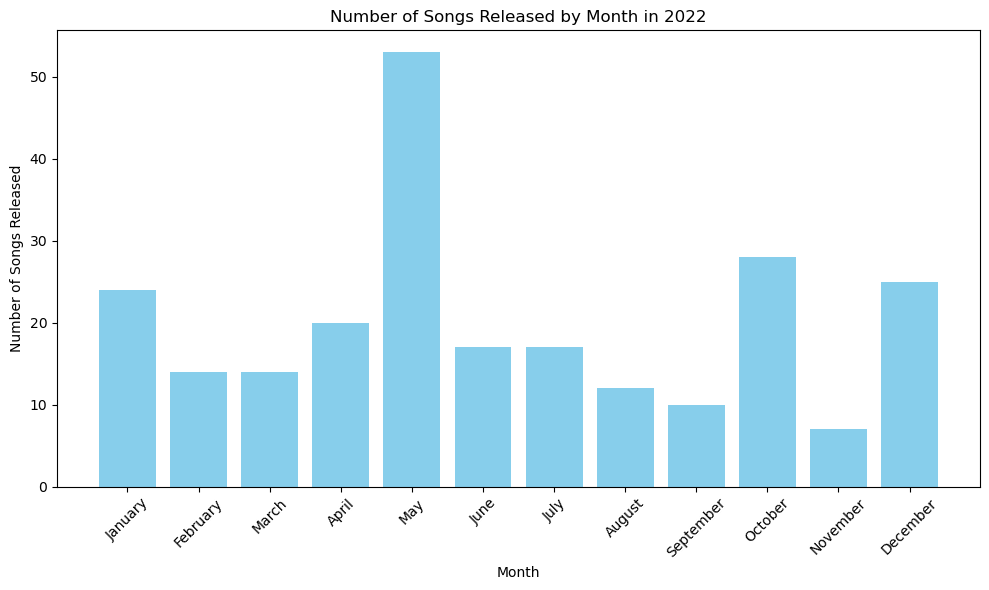

In [31]:
# calling the function
plot_tracks_by_month(spotify_data)

In [32]:
# Calculates the number of songs in the top 10% by streams and the total streams of those songs
def number_of_songs_in_top_10_percent(data):
    
    # Convert 'streams' to integers
    data = [song for song in data if song['streams'].isdigit()]  
    data = [{**song, 'streams': int(song['streams'])} for song in data]  
    sorted_data = sorted(data, key=lambda x: x['streams'], reverse=True)
    top_10_percent = int(0.1 * len(data))
    top_10_percent_streams = sum(song['streams'] for song in sorted_data[:top_10_percent])
    
    result = {
        'top_songs_count': top_10_percent,
        'top_songs_total_streams': top_10_percent_streams
    }
    
    return result    

In [33]:
# Call the function and get the result in a dictionary
top_10_percent_info = number_of_songs_in_top_10_percent(spotify_data)

# Print the results
print("Number of songs in the top 10% of stream counts:", top_10_percent_info['top_songs_count'])
print("Total streams in the top 10%:", top_10_percent_info['top_songs_total_streams'])

Number of songs in the top 10% of stream counts: 94
Total streams in the top 10%: 160210803820


In [34]:
# Calculates the top 10 artists with most tracks
def top_10_artists_with_most_tracks(data):
    artist_counts = {}
    for song in data:
        artists = song['artist(s)_name'].split(', ')
        for artist in artists:
            if artist in artist_counts:
                artist_counts[artist] += 1
            else:
                artist_counts[artist] = 1
    top_artists = sorted(artist_counts.items(), key=lambda x: x[1], reverse=True)[:10]
    return top_artists

In [35]:
# call the function
top_artists = top_10_artists_with_most_tracks(spotify_data)

# Print the top 10 artists with the most tracks
for artist, track_count in top_artists:
    print(f"{artist}, Number of Tracks: {track_count}")

Taylor Swift, Number of Tracks: 32
The Weeknd, Number of Tracks: 22
Bad Bunny, Number of Tracks: 19
SZA, Number of Tracks: 19
Harry Styles, Number of Tracks: 17
"Drake, Number of Tracks: 15
Kendrick Lamar, Number of Tracks: 12
"The Weeknd, Number of Tracks: 11
Morgan Wallen, Number of Tracks: 11
"Kendrick Lamar, Number of Tracks: 11


In [36]:
# Calculates the Minimum and Maximum BPM values
def find_bpm_range(data):
    bpm_values = []
    for song in data:
        bpm_str = song['bpm'].replace('"', '').strip()
        if bpm_str:
            try:
                bpm = float(bpm_str)
                bpm_values.append(bpm)
            except ValueError:
                pass 

    if bpm_values:
        min_bpm = min(bpm_values)
        max_bpm = max(bpm_values)
        return min_bpm, max_bpm
    else:
        return None, None

In [37]:
# Call the function to find the minimum and maximum BPM values
min_bpm, max_bpm = find_bpm_range(spotify_data)

if min_bpm is not None and max_bpm is not None:
    print(f"Minimum BPM: {min_bpm}")
    print(f"Maximum BPM: {max_bpm}")
else:
    print("No valid BPM values found in the dataset.")

Minimum BPM: 0.0
Maximum BPM: 432719968.0


In [38]:
# Calculates the top 10 most energetic songs
def top_10_most_energetic_songs(data):

    top_energetic_songs = []

    for song in data:

        try:
            energy_percentage = float(song['energy_%'][:-1])
        except ValueError:
            continue

        if song not in top_energetic_songs:
            top_energetic_songs.append(song)

    # Sort the list of top 10 most energetic songs by energy percentage in descending order.
    top_energetic_songs.sort(key=lambda song: song['energy_%'][:-1], reverse=True)

    # Return the top 10 most energetic songs.
    return top_energetic_songs[:10]

In [39]:
# call the function and print the top 10 most energetic songs
top_10_most_energetic_songs = top_10_most_energetic_songs(spotify_data)

print("Top 10 Most Energetic Songs:" + '\n')
for song in top_10_most_energetic_songs:
  print(f"{song['track_name']} by {song['artist(s)_name']}")

Top 10 Most Energetic Songs:

Sunflower - Spider-Man: Into the Spider-Verse by "Post Malone
Chemical by Post Malone
Rara Vez by "Taiu
"Gol Bolinha by  Gol Quadrado 2"
ýýýýýýýýýýýý by YOASOBI
Shake It Off by Taylor Swift
Shape of You by Ed Sheeran
Las Morras by "BLESSD
Murder In My Mind by Kordhell
One Thing At A Time by Morgan Wallen


In [40]:
# Calculates top 10 instrumental tracks
def top_10_instrumental_tracks(data):
    # Filter and clean the data to remove invalid 'instrumentalness_%' entries
    cleaned_data = [track for track in data if track['instrumentalness_%'].replace('.', '', 1).isdigit()]

    # Sort the cleaned data by instrumentalness in descending order
    sorted_data = sorted(cleaned_data, key=lambda x: float(x['instrumentalness_%']), reverse=True)

    # Print the top 10 most instrumental tracks
    print("Top 10 Most Instrumental Tracks:")
    for i, track in enumerate(sorted_data[:10], 1):
        print(f"{i}. Track: {track['track_name']} | Instrumentalness: {track['instrumentalness_%']}")

In [41]:
# Call the function to find and display the top 10 most instrumental tracks
top_10_instrumental_tracks(spotify_data)

Top 10 Most Instrumental Tracks:
1. Track: Los del Espacio | Instrumentalness: 120
2. Track: "What Was I Made For? [From The Motion Picture ""Barbie""]" | Instrumentalness: 96
3. Track: LA FAMA (with The Weeknd) | Instrumentalness: 95
4. Track: Cold Heart - PNAU Remix | Instrumentalness: 92
5. Track: All of Me | Instrumentalness: 92
6. Track: The Joker And The Queen (feat. Taylor Swift) | Instrumentalness: 92
7. Track: Baby Don't Hurt Me | Instrumentalness: 91
8. Track: Alien Blues | Instrumentalness: 91
9. Track: ULTRA SOLO REMIX | Instrumentalness: 91
10. Track: Watch This - ARIZONATEARS Pluggnb Remix | Instrumentalness: 90


In [42]:
# Plots the distribution of audio features
def plot_audio_features_distribution(data):
    danceability = []
    energy = []
    valence = []

    for song in data:
        try:
            danceability.append(float(song['danceability_%'][:-1]))
            energy.append(float(song['energy_%'][:-1]))
            valence.append(float(song['valence_%'][:-1]))
        except ValueError:
            continue

    plt.figure(figsize=(12, 6))
    sns.histplot(danceability, kde=True, color='b', label='Danceability', bins=20)
    sns.histplot(energy, kde=True, color='g', label='Energy', bins=20)
    sns.histplot(valence, kde=True, color='r', label='Valence', bins=20)

    plt.xlabel('Percentage (%)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Audio Features')
    plt.legend()
    plt.show()

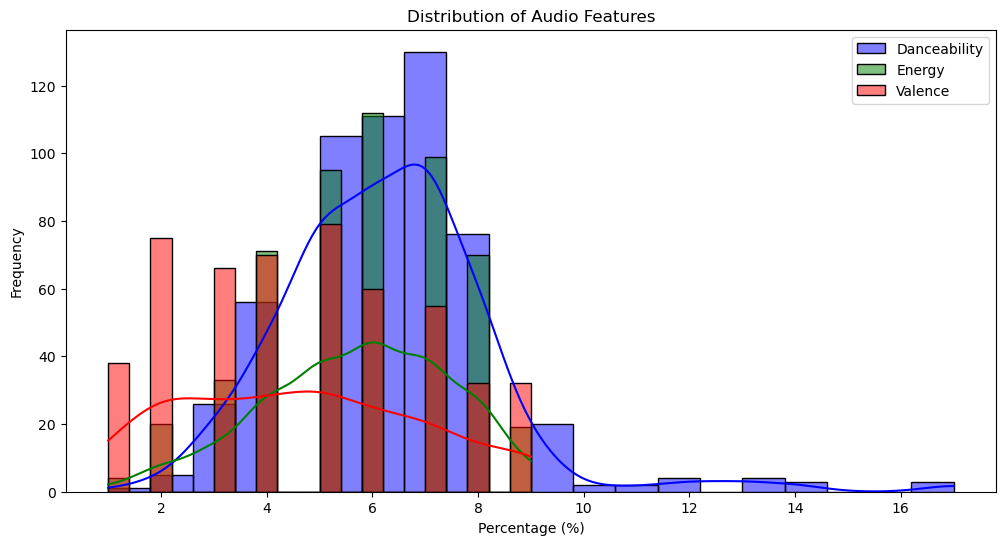

In [43]:
# call the function
plot_audio_features_distribution(spotify_data)

In [44]:
# Plots the data for 'Liveness_%'
def plot_liveness(data):
    liveness = []

    for song in data:
        liveness_str = song['liveness_%'][:-1]
        
        if liveness_str and liveness_str.isnumeric():
            liveness_value = float(liveness_str)
            liveness.append(liveness_value)

    # Define bubble size and color
    bubble_size = [value * 100 for value in liveness]
    bubble_color = liveness

    plt.figure(figsize=(10, 8))
    plt.scatter(range(len(liveness)), liveness, s=bubble_size, c=bubble_color, cmap='coolwarm', alpha=0.5)
    plt.xlabel('Song Index')
    plt.ylabel('Liveness (%)')
    plt.title('Liveness Bubble Plot')
    plt.grid(True)

    # Create a colorbar to represent the liveness values
    cbar = plt.colorbar()
    cbar.set_label('Liveness (%)')

    plt.show()

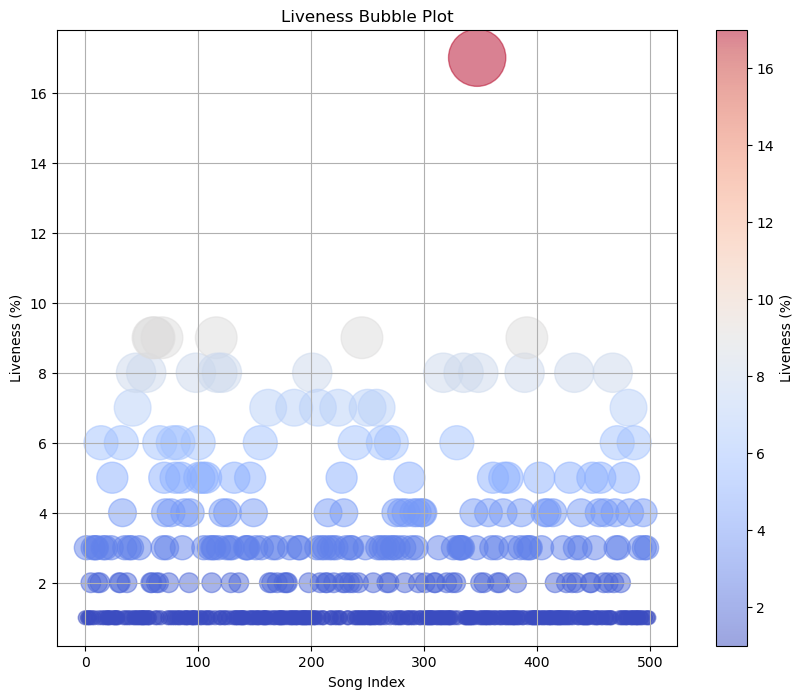

In [45]:
# Call the function
plot_liveness(spotify_data)